In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
from pycytominer.cyto_utils import infer_cp_features
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds
from utils import eval

In [2]:
df = pd.read_csv("/Users/mbornhol/git/neural-profiling/00_thesis/pre_trained/aggregated_efficientnet_median.csv")

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.shape)
# features = infer_cp_features(df)
# meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df)
df = e.norm_agg()
hit = e.eval(df, operation = 'hitk')

(8733, 6418)
6400 features were identified


In [7]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/813/813_aggregated_median.csv')
print(df.shape)
# features = infer_cp_features(df)
# meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df)
df = e.norm_agg()
hit_trained = e.eval(df, operation = 'hitk')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8745, 1298)
1280 features were identified


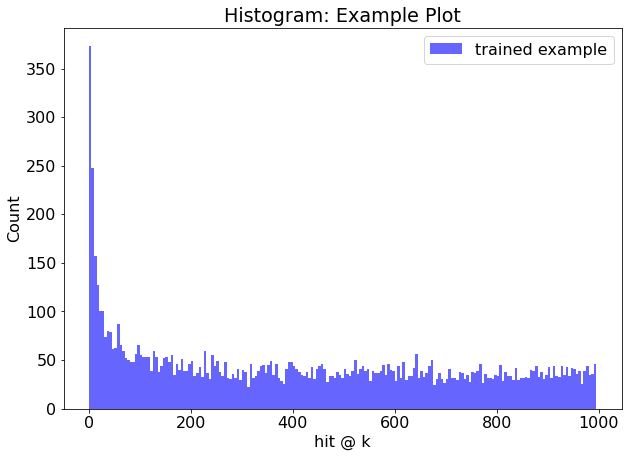

In [23]:
bins = np.arange(0,1000,5)
plt.style.use({'figure.facecolor':'white'})
fig, ax = plt.subplots(figsize=(10,7))
plt.hist(hit_trained[0], bins, alpha=0.6, color='blue', label='trained example')
# plt.hist(hit_trained[0], bins, alpha=0.6, color='red', label='Trained')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram: Example Plot')
plt.legend()
plt.show()

In [20]:
hit = eval.hitk_prep(e.eval(df, operation = 'hitk'))

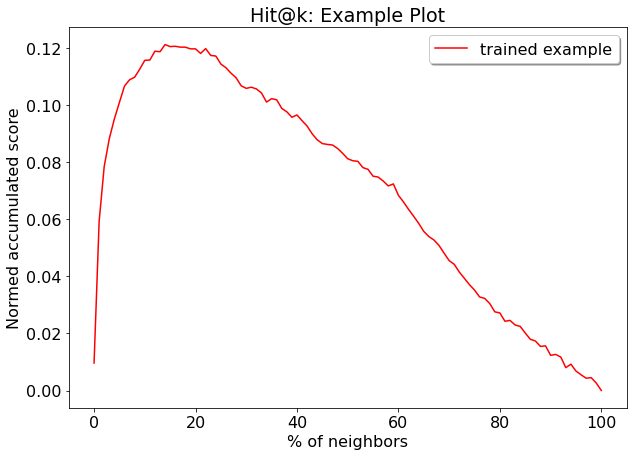

In [21]:
eval.plotting.hitk("Hit@k: Example Plot", index1= hit, label_1="trained example")

,0
0,96
1,591
2,783
3,880
4,949
...,...
96,55
97,43
98,45
99,26


In [ ]:
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit[0], bins, alpha=0.6, color='blue', label='Pre-trained')
plt.hist(hit_trained[0], bins, alpha=0.6, color='red', label='Trained')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()

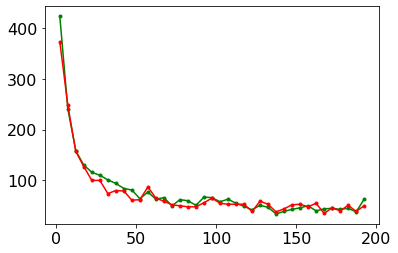

In [35]:
bins = np.arange(0,200,5)
x, bins = np.histogram(hit[0], bins)
trained, bins = np.histogram(hit_trained[0], bins)

# x, bins, _ = plt.hist(hit[0], bins, alpha=0.6, color='blue', label='CP features')
bincenters = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bincenters, x, 'g-', marker = '.')
plt.plot(bincenters, trained, 'r-', marker = '.')
plt.show()

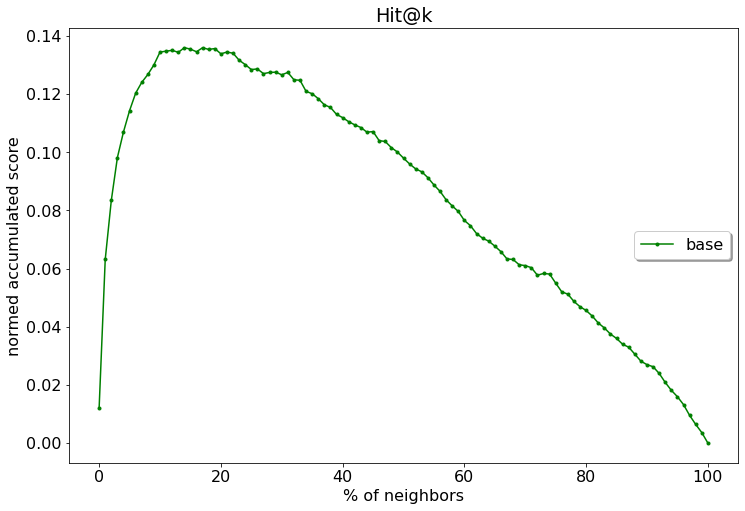

In [14]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Hit@k")
plt.plot(score, marker=".", color="g", label = 'base')
plt.ylabel('normed accumulated score')
plt.xlabel('% of neighbors')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [8]:
df = pd.read_csv('2016_04_01_a549_48hr_batch1_dmso_spherized_profiles_with_input_normalized_by_dmso_consensus_median.csv.gz')
df = ds.clean_moas(df)
df = ds.drop_feats(df, 30)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df, features=features, meta_features=meta_features)
sph = e.eval(df, operation = 'hitk')

dropped 699 features


In [9]:
sph_score = [x/len(sph[0]) for x in sph[1].values()]

In [20]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/pre-trained/efficient_net/aggregated/aggregated_efficientnet_median.csv', low_memory=False)

In [21]:
e = eval.evaluation(df)
con = e.norm_agg()

6400 features were identified


In [22]:
eff = e.eval(con, operation = 'hitk')

In [23]:
eff_score = [x/len(eff[0]) for x in eff[1].values()]

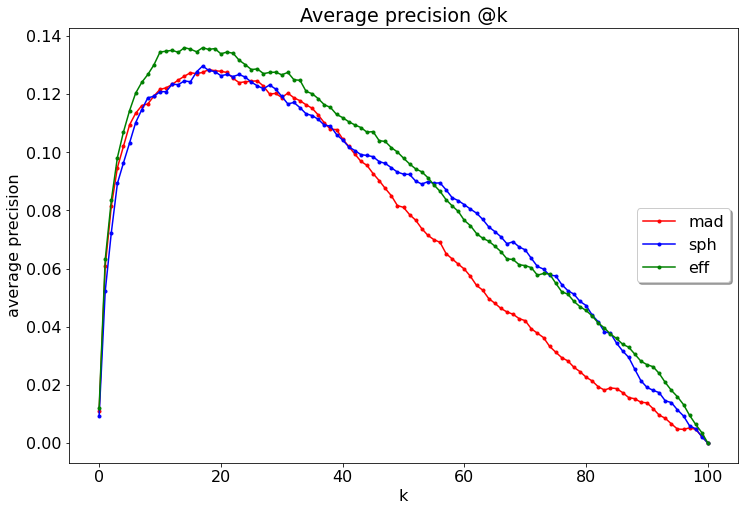

In [26]:
# print('eff', eff_pre_r)
# print('mad', mad_pre_r)
# print('sph', sph_pre_r)
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(mad_score, marker=".", color="r", label = 'mad')
plt.plot(sph_score, marker=".", color="b", label = 'sph')
plt.plot(eff_score, marker=".", color="g", label = 'eff')
# plt.plot(sph_pre["k"], sph_pre["precision"], marker="o", color="r", label = 'sph')
# plt.plot(sph_pre["k"], sph_pre["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [ ]:
eff_pre.to_csv('../plot_storage/precision_doof_eff_pre.csv')
eff_pre.to_csv('../plot_storage/precision_doof_mad_pre.csv')
sph_pre.to_csv('../plot_storage/precision_doof_sph_pre.csv')

In [12]:
sum(mad_score)

7.296292585170346

8.165531062124249

{0: 110,
 1: 607,
 2: 813,
 3: 945,
 4: 1019,
 5: 1092,
 6: 1132,
 7: 1158,
 8: 1164,
 9: 1191,
 10: 1214,
 11: 1219,
 12: 1231,
 13: 1246,
 14: 1259,
 15: 1271,
 16: 1268,
 17: 1272,
 18: 1282,
 19: 1278,
 20: 1276,
 21: 1272,
 22: 1252,
 23: 1237,
 24: 1240,
 25: 1242,
 26: 1243,
 27: 1225,
 28: 1198,
 29: 1200,
 30: 1186,
 31: 1201,
 32: 1185,
 33: 1175,
 34: 1161,
 35: 1149,
 36: 1126,
 37: 1099,
 38: 1077,
 39: 1076,
 40: 1044,
 41: 1018,
 42: 992,
 43: 967,
 44: 953,
 45: 925,
 46: 901,
 47: 874,
 48: 849,
 49: 815,
 50: 809,
 51: 784,
 52: 765,
 53: 736,
 54: 713,
 55: 698,
 56: 689,
 57: 650,
 58: 632,
 59: 614,
 60: 597,
 61: 572,
 62: 541,
 63: 525,
 64: 496,
 65: 480,
 66: 462,
 67: 450,
 68: 442,
 69: 427,
 70: 420,
 71: 392,
 72: 377,
 73: 362,
 74: 332,
 75: 312,
 76: 293,
 77: 282,
 78: 260,
 79: 245,
 80: 226,
 81: 213,
 82: 193,
 83: 182,
 84: 189,
 85: 187,
 86: 173,
 87: 156,
 88: 152,
 89: 140,
 90: 138,
 91: 118,
 92: 96,
 93: 85,
 94: 66,
 95: 48,
 96: 47,
 97: 52